In [111]:
import pandas as pd

In [112]:
base = pd.read_csv('data.csv')

In [113]:
pd.set_option('display.max_columns', None)

In [114]:
base.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97


In [115]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   object 
 8   Order Priority     5000 non-null   object 
 9   Product Name       5000 non-null   object 
 10  Product Category   5000 non-null   object 
 11  Product Container  5000 non-null   object 
 12  Ship Mode          5000 non-null   object 
 13  Ship Date          5000 non-null   object 
 14  Cost Price         5000 non-null   object 
 15  Retail Price       5000 non-null   object 
 16  Profit Margin      5000 

In [116]:
columnas_a_limpiar = ['Cost Price','Retail Price','Profit Margin','Sub Total','Discount $','Order Total','Shipping Cost','Total']

for columna in columnas_a_limpiar:
    base[columna] = base[columna].str.replace('$', '')
    base[columna] = base[columna].str.replace(',', '')
    base[columna] = base[columna].astype(float)

base['Discount %'] = base['Discount %'].str.replace('%', '')
base['Discount %'] = base['Discount %'].astype(float)

In [117]:
base['Sub Total'] = base['Retail Price'] * base['Order Quantity']

In [118]:
base['Discount $'] = round(base['Sub Total'] * (base['Discount %'] / 100),2)  
base['Order Total'] = base['Sub Total'] - base['Discount $'] 
base['Total'] = base['Order Total'] + base['Shipping Cost']


In [119]:
base.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,156.50,300.97,144.47,23.0,6922.31,2.0,138.45,6783.86,7.18,6791.04
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,0.24,1.26,1.02,8.0,10.08,3.0,0.30,9.78,0.70,10.48
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,42.11,80.98,38.87,45.0,3644.10,4.0,145.76,3498.34,7.18,3505.52
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,5.33,8.60,3.27,16.0,137.60,1.0,1.38,136.22,6.19,142.41
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,1.53,2.78,1.25,49.0,136.22,7.0,9.54,126.68,1.34,128.02


Modelo Relacional que vamos a tratar de implementar:

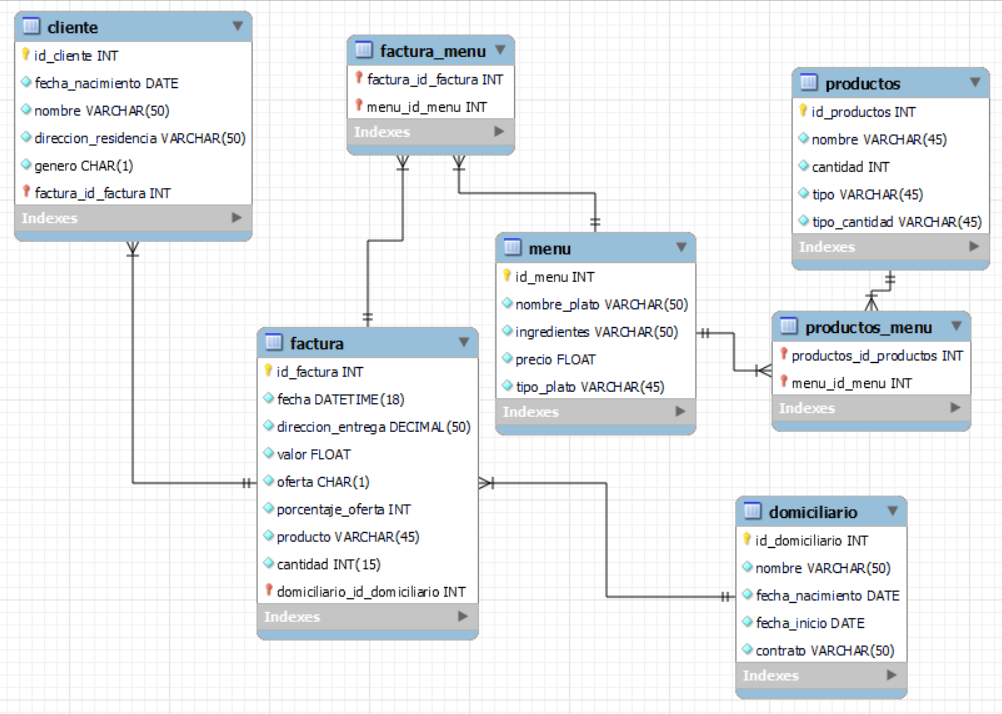

Como se puede ver, nuestra base de datos se va a tener que ajustar a nuestro modelo, pero van a haber cambios irremediablemente, por lo que
en este informe se va a ir llevando un registro de los cambios que se van a ir realizando en la base de datos.

# Cliente

In [120]:
base.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,156.50,300.97,144.47,23.0,6922.31,2.0,138.45,6783.86,7.18,6791.04
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,0.24,1.26,1.02,8.0,10.08,3.0,0.30,9.78,0.70,10.48
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,42.11,80.98,38.87,45.0,3644.10,4.0,145.76,3498.34,7.18,3505.52
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,5.33,8.60,3.27,16.0,137.60,1.0,1.38,136.22,6.19,142.41
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,1.53,2.78,1.25,49.0,136.22,7.0,9.54,126.68,1.34,128.02


In [121]:
campos_cliente = ['Customer Name', 'Address', 'City', 'State', 'Customer Type', 'Account Manager']
base_cliente = base[campos_cliente]
base_cliente = base_cliente.drop_duplicates()

In [122]:
import gender_guesser.detector as gender

def determinar_genero(nombre):
    d = gender.Detector()
    genero = d.get_gender(nombre)
    return genero

base_cliente['Gender'] = base_cliente['Customer Name'].apply(lambda x: determinar_genero(x.split()[0]))



In [123]:
import random

def ajustar_genero(genero):
    if genero in ['male', 'female']:
        return genero
    elif genero == 'mostly_female':
        return 'female'
    elif genero == 'mostly_male':
        return 'male'
    elif genero in ['unknown','andy']:
        return random.choice(['male', 'female'])
    else:
        return random.choice(['male', 'female'])

base_cliente['Gender'] = base_cliente['Gender'].apply(ajustar_genero)


In [127]:
import random
from datetime import datetime, timedelta

def generar_edad():
    return random.randint(30, 70)

def generar_fecha_nacimiento(edad):
    año_actual = datetime.now().year
    año_nacimiento = año_actual - edad
    fecha_nacimiento = datetime(year=año_nacimiento, month=random.randint(1, 12), day=random.randint(1, 28))  # Se asume un máximo de 28 días en un mes
    return fecha_nacimiento

# Generar una edad aleatoria para cada fila en base_clientes y usarla para generar la fecha de nacimiento correspondiente
base_cliente['Age'] = base_cliente.apply(lambda x: generar_edad(), axis=1)
base_cliente['Birthdate'] = base_cliente['Age'].apply(lambda x: generar_fecha_nacimiento(x))



In [128]:
base_cliente.head()

,Customer Name,Address,City,State,Customer Type,Account Manager,Gender,Age,Birthdate
0,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,male,68,1956-01-27
1,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,male,32,1992-11-22
2,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,male,49,1975-06-15
3,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,male,66,1958-11-06
4,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,female,62,1962-05-02


# Menu/Productos

In [129]:
base.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,156.50,300.97,144.47,23.0,6922.31,2.0,138.45,6783.86,7.18,6791.04
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,0.24,1.26,1.02,8.0,10.08,3.0,0.30,9.78,0.70,10.48
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,42.11,80.98,38.87,45.0,3644.10,4.0,145.76,3498.34,7.18,3505.52
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,5.33,8.60,3.27,16.0,137.60,1.0,1.38,136.22,6.19,142.41
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,1.53,2.78,1.25,49.0,136.22,7.0,9.54,126.68,1.34,128.02


In [130]:
campos_productos = ['Product Name', 'Product Category', 'Cost Price']
base_productos = base[campos_productos]
base_productos = base_productos.drop_duplicates()

In [132]:
base_productos.head()

,Product Name,Product Category,Cost Price
0,UGen Ultra Professional Cordless Optical Suite,Office Supplies,156.50
1,Bagged Rubber Bands,Office Supplies,0.24
2,TechSavi Cordless Navigator Duo,Office Supplies,42.11
3,Artisan Printable Repositionable Plastic Tabs,Office Supplies,5.33
4,Pizazz Drawing Pencil Set,Office Supplies,1.53


# Empresas de Envios

In [134]:
shipping_companies = [
    {'Company': 'UPS', 'Coverage': 'National', 'Delivery Time': '2-7 days', 'Average Rate': '$10-$50'},
    {'Company': 'FedEx', 'Coverage': 'National and International', 'Delivery Time': '1-5 days', 'Average Rate': '$15-$60'},
    {'Company': 'USPS', 'Coverage': 'National', 'Delivery Time': '2-10 days', 'Average Rate': '$5-$30'},
    {'Company': 'DHL', 'Coverage': 'National and International', 'Delivery Time': '1-7 days', 'Average Rate': '$20-$70'}
]
base_domiciliarios = pd.DataFrame(shipping_companies)

In [136]:
base['Shipping Company'] = random.choices(base_domiciliarios['Company'], k=len(base))

In [137]:
base.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Shipping Company
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,156.50,300.97,144.47,23.0,6922.31,2.0,138.45,6783.86,7.18,6791.04,UPS
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,0.24,1.26,1.02,8.0,10.08,3.0,0.30,9.78,0.70,10.48,FedEx
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,42.11,80.98,38.87,45.0,3644.10,4.0,145.76,3498.34,7.18,3505.52,USPS
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,5.33,8.60,3.27,16.0,137.60,1.0,1.38,136.22,6.19,142.41,UPS
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,1.53,2.78,1.25,49.0,136.22,7.0,9.54,126.68,1.34,128.02,USPS


In [138]:
base_domiciliarios.head()

,Company,Coverage,Delivery Time,Average Rate
0,UPS,National,2-7 days,$10-$50
1,FedEx,National and International,1-5 days,$15-$60
2,USPS,National,2-10 days,$5-$30
3,DHL,National and International,1-7 days,$20-$70


In [153]:
base_cliente['Id_customer'] = range(1, len(base_cliente) + 1)
base_productos['Id_product'] = range(1, len(base_productos) + 1)
base_domiciliarios['Id_delivery'] = range(1, len(base_domiciliarios) + 1)

# Relaciones

In [197]:
base_cliente.head()

,Customer Name,Address,City,State,Customer Type,Account Manager,Gender,Age,Birthdate,Id_customer
0,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,male,68,1956-01-27,1
1,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,male,32,1992-11-22,2
2,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,male,49,1975-06-15,3
3,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,male,66,1958-11-06,4
4,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,female,62,1962-05-02,5


In [206]:
base2 = base.copy()
base_cliente_unique = base_cliente.drop_duplicates(subset=['Id_customer'])



In [207]:
base2 = pd.merge(base, base_cliente_unique, on=['Customer Name', 'Address', 'City', 'State', 'Customer Type', 'Account Manager'], how='left')


In [208]:
base2 = pd.merge(base2, base_domiciliarios, left_on=['Shipping Company'], right_on= ['Company'], how='left')


In [209]:
base2 = pd.merge(base2, base_productos, on=['Product Name', 'Product Category', 'Cost Price'], how='left')

# Factura

In [210]:
base2.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Shipping Company,Gender,Age,Birthdate,Id_customer,Company,Coverage,Delivery Time,Average Rate,Id_delivery,Id_product
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,156.50,300.97,144.47,23.0,6922.31,2.0,138.45,6783.86,7.18,6791.04,UPS,male,68,1956-01-27,1,UPS,National,2-7 days,$10-$50,1,1
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,0.24,1.26,1.02,8.0,10.08,3.0,0.30,9.78,0.70,10.48,FedEx,male,32,1992-11-22,2,FedEx,National and International,1-5 days,$15-$60,2,2
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,42.11,80.98,38.87,45.0,3644.10,4.0,145.76,3498.34,7.18,3505.52,USPS,male,49,1975-06-15,3,USPS,National,2-10 days,$5-$30,3,3
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,5.33,8.60,3.27,16.0,137.60,1.0,1.38,136.22,6.19,142.41,UPS,male,66,1958-11-06,4,UPS,National,2-7 days,$10-$50,1,4
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,1.53,2.78,1.25,49.0,136.22,7.0,9.54,126.68,1.34,128.02,USPS,female,62,1962-05-02,5,USPS,National,2-10 days,$5-$30,3,5


In [212]:
base_factura = base2[['Order No', 'Order Date', 'Order Priority', 'Product Container', 'Ship Mode', 'Ship Date',
       'Retail Price', 'Profit Margin', 'Order Quantity', 'Sub Total', 'Discount %', 'Discount $', 'Order Total', 'Shipping Cost',
       'Total', 'Id_customer', 'Id_delivery', 'Id_product']].copy()


In [213]:
base_factura.head()

,Order No,Order Date,Order Priority,Product Container,Ship Mode,Ship Date,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Id_customer,Id_delivery,Id_product
0,4293-1,02-09-2014,Critical,Small Box,Regular Air,04-09-2014,300.97,144.47,23.0,6922.31,2.0,138.45,6783.86,7.18,6791.04,1,1,1
1,5001-1,24-10-2015,Medium,Small Pack,Regular Air,26-10-2015,1.26,1.02,8.0,10.08,3.0,0.30,9.78,0.70,10.48,2,2,2
2,5004-1,13-03-2014,Not Specified,Small Box,Regular Air,13-03-2014,80.98,38.87,45.0,3644.10,4.0,145.76,3498.34,7.18,3505.52,3,3,3
3,5009-1,18-02-2013,Critical,Wrap Bag,Regular Air,20-02-2013,8.60,3.27,16.0,137.60,1.0,1.38,136.22,6.19,142.41,4,1,4
4,5010-1,13-09-2014,Not Specified,Wrap Bag,Express Air,17-09-2014,2.78,1.25,49.0,136.22,7.0,9.54,126.68,1.34,128.02,5,3,5


In [215]:
base_cliente.head()

,Customer Name,Address,City,State,Customer Type,Account Manager,Gender,Age,Birthdate,Id_customer
0,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,male,68,1956-01-27,1
1,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,male,32,1992-11-22,2
2,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,male,49,1975-06-15,3
3,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,male,66,1958-11-06,4
4,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,female,62,1962-05-02,5


In [222]:
base_cliente2 = base_cliente[['Id_customer', 'Customer Name', 'Age','Birthdate', 'Gender', 'Customer Type', 'Address', 'City', 'State',  'Account Manager']]
base_domiciliarios2 = base_domiciliarios[['Id_delivery', 'Company', 'Coverage', 'Delivery Time', 'Average Rate']]
base_productos2 = base_productos[['Id_product', 'Product Name', 'Product Category', 'Cost Price']]

In [221]:
base_productos.head()

,Product Name,Product Category,Cost Price,Id_product
0,UGen Ultra Professional Cordless Optical Suite,Office Supplies,156.50,1
1,Bagged Rubber Bands,Office Supplies,0.24,2
2,TechSavi Cordless Navigator Duo,Office Supplies,42.11,3
3,Artisan Printable Repositionable Plastic Tabs,Office Supplies,5.33,4
4,Pizazz Drawing Pencil Set,Office Supplies,1.53,5


In [223]:
base_cliente2.to_csv('tabla_clientes.csv', index=False)
base_productos2.to_csv('tabla_productos.csv', index=False)
base_domiciliarios2.to_csv('tabla_empresas_envios.csv', index=False)
base_factura.to_csv('tabla_estado_ventas.csv', index=False)